In [12]:
import pandas
import os
import itertools
import numpy as np
import nibabel as ni
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.formula.api as smf
from glob import glob
from nilearn import image
#from scipy import stats
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn import model_selection, linear_model
# from sklearn import mixture
# from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
# from nilearn import image, plotting
# from sklearn.neighbors import kneighbors_graph
# from sklearn.metrics import calinski_harabaz_score
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import AgglomerativeClustering
# from mpl_toolkits.mplot3d import Axes3D

In [5]:
git_dir = '/home/users/jvogel/git/Hippocampus_AP_Axis/'
import sys
sys.path.insert(0,git_dir)

import HAP_Utils as hap

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


# Get hippocampus samples

In [3]:
wdir = '/data1/users/jvogel/Allen_Human_Brain_Atlas/'
df = pandas.read_csv(os.path.join(wdir,'MAIN_hippocampus_sample_info.csv'))
#df =  pandas.read_csv(os.path.join(wdir,'MAIN_ALLVAR_hippocampus_sample_info.csv'), index_col=0)
xp = pandas.read_csv(os.path.join(wdir,'MAIN_hippocampus_gxp.csv'),index_col=0)
gdf = pandas.read_csv(os.path.join(wdir,'MAIN_gcx_wholebrain_info.csv'))
#gdf = pandas.read_csv(os.path.join(wdir,'MAIN_gcx_wholebrain_info_W_SMALL_SETS.csv'))
probes = pandas.read_csv(os.path.join(wdir,'normalized_microarray_donor9861/Probes.csv'))

In [312]:
# PERSONAL COMPUTER
wdir = '/Users/jakevogel/Science/AHBA/'
df = pandas.read_csv(os.path.join(wdir,'MAIN_hippocampus_sample_info.csv'))
xp = pandas.read_csv(os.path.join(wdir,'MAIN_hippocampus_gxp.csv'),index_col=0)
gdf = pandas.read_csv(os.path.join(wdir,'MAIN_gcx_wholebrain_info.csv'))
probes = pandas.read_csv('/Users/jakevogel/Downloads/normalized_microarray_donor9861/Probes.csv')

# Run main analysis pipeline and evaluate

In [8]:
pcalr_out_NEW = hap.PCA_LR_pipeline(xp.values.T, 
                            (df.position_along_hipp_AP_axis), 
                            cv_strategy='score', illustrative=True,
                           test_gene_num = [1, 2, 5, 10, 20, 50, 100, 
                                            200, 500, 1000, 2000, 5000],
                               sanity_check_style = 'separate')

# Cognitive fmri meta-analysis

In [9]:
#OKAY, NOW REPEAT WITH ALL 100 MAPS
metascans = sorted(glob('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/cognition_mri_analysis/all_maps_RI/r*.nii.gz'))
print(len(metascans))
metascans[0]

100


'/home/users/jvogel/Science/Allen_Human_Brain_Atlas/cognition_mri_analysis/all_maps_RI/rv4-topics-100_0_stimulation_somatosensory_tms_pFgA_z_FDR_0_img.nii.gz'

In [1137]:
#metalabs

In [10]:
metalabs = ['T%s_%s_%s_%s'%(os.path.split(x)[-1].split('_')[1],
                         os.path.split(x)[-1].split('_')[3],
                            os.path.split(x)[-1].split('_')[4],
                         os.path.split(x)[-1].split('_')[-5]) for x in metascans]
metares_a = pandas.DataFrame(index=gdf.index,columns = metalabs)
#metares_a.columns = metalabs
metares_a.shape

(3702, 100)

In [16]:
allmetas = image.load_img(metascans).get_data()

In [17]:
col = 'AP_axis_gxp_signature_similarity_SPCR'
#gdf.loc[:,'gvec'] = vec100
#col = 'gvec'
for i,row in gdf.iterrows():
    xs,ys,zs = hap.make_sphere(hap.convert_coords([row['mni_nlin_x'],row['mni_nlin_y'],row['mni_nlin_z']],'xyz'), 3)
    for img in range(allmetas.shape[-1]):
        if allmetas[xs,ys,zs,img].mean() > 0:
            metares_a.loc[i,metalabs[img]] = row[col]
    if i%100 == 0:
        print('finished %s of 3702'%i)

finished 0 of 3702
finished 100 of 3702
finished 200 of 3702
finished 300 of 3702
finished 400 of 3702
finished 500 of 3702
finished 600 of 3702
finished 700 of 3702
finished 800 of 3702
finished 900 of 3702
finished 1000 of 3702
finished 1100 of 3702
finished 1200 of 3702
finished 1300 of 3702
finished 1400 of 3702
finished 1500 of 3702
finished 1600 of 3702
finished 1700 of 3702
finished 1800 of 3702
finished 1900 of 3702
finished 2000 of 3702
finished 2100 of 3702
finished 2200 of 3702
finished 2300 of 3702
finished 2400 of 3702
finished 2500 of 3702
finished 2600 of 3702
finished 2700 of 3702
finished 2800 of 3702
finished 2900 of 3702
finished 3000 of 3702
finished 3100 of 3702
finished 3200 of 3702
finished 3300 of 3702
finished 3400 of 3702
finished 3500 of 3702
finished 3600 of 3702
finished 3700 of 3702


In [18]:
map_sizes = []
for i in range(allmetas.shape[-1]):
    jnk = allmetas[:,:,:,i]
    map_sizes.append(len(jnk[jnk>0]))

In [19]:
del(allmetas)

In [20]:
map_hits = []
for col in metares_a.columns:
    jnk = metares_a[col]
    map_hits.append(len([x for x in jnk.values if pandas.notnull(x)]))

In [21]:
res_sum = pandas.DataFrame(index = metares_a.columns)
res_sum.loc[:,'mean'] = metares_a.mean().values
res_sum.loc[:,'sem'] = metares_a.sem().values
res_sum.loc[:,'map_size'] = map_sizes
res_sum.loc[:,'map_hits'] = map_hits

In [22]:
res_sum.sort_values('mean').head()

,mean,sem,map_size,map_hits
T29_delayed_roi_pFgA,-0.062083,0.007179,1848,20
T93_eyes_movements_pFgA,-0.039965,0.002010,146429,398
T9_attentional_visual_pFgA,-0.032526,0.002561,107198,221
T88_perception_visual_pFgA,-0.032333,0.003025,92493,178
T36_auditory_sensory_pFgA,-0.031379,0.002618,102886,327


In [23]:
cols = ['mean','sem']
for col in cols:
    wtd = (res_sum[col].values * res_sum.map_hits.values
          ) / (res_sum[col].values + res_sum.map_hits.values)
    res_sum.loc[:,'wtd_%s'%col] = wtd

In [24]:
res_sum.sort_values('mean').head()

,mean,sem,map_size,map_hits,wtd_mean,wtd_sem
T29_delayed_roi_pFgA,-0.062083,0.007179,1848,20,-0.062276,0.007177
T93_eyes_movements_pFgA,-0.039965,0.002010,146429,398,-0.039969,0.002010
T9_attentional_visual_pFgA,-0.032526,0.002561,107198,221,-0.032530,0.002561
T88_perception_visual_pFgA,-0.032333,0.003025,92493,178,-0.032339,0.003025
T36_auditory_sensory_pFgA,-0.031379,0.002618,102886,327,-0.031382,0.002618


In [25]:
goodlabs = metares_a.mean().dropna().index
len(goodlabs)
metaresb = metares_a[goodlabs]
metaresb = metaresb[metaresb.mean().sort_values().index]

In [26]:
ATLabs = ['T65','T60','T17','T20','T90']
PMLabs = ['T56','T24','T40','T14','T75']
for top in res_sum.index:
    tnum = top.split('_')[0]
    if tnum in ATLabs:
        res_sum.loc[top,'system'] = 'AT'
    elif tnum in PMLabs:
        res_sum.loc[top,'system'] = 'PM'
res_sum2 = res_sum.loc[metaresb.columns]

In [27]:
goodlabs = res_sum[res_sum.map_hits>100].index
len(goodlabs)
metares100 = metares_a[goodlabs]
metares100 = metares100[metares100.mean().sort_values().index]

In [28]:
res_sum3 = res_sum.loc[metares100.columns]

In [29]:
len(res_sum3)

54

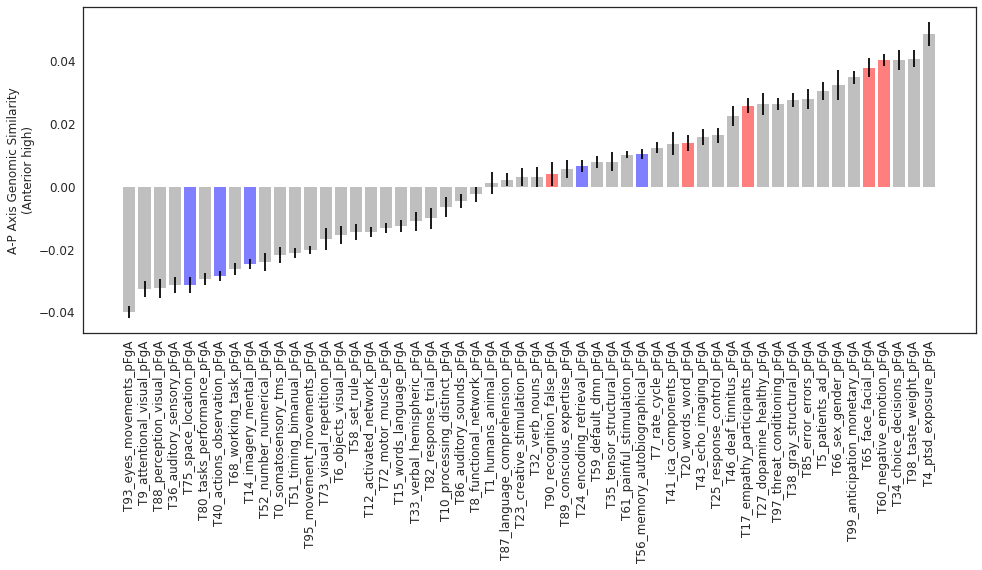

In [30]:
sns.set_context('notebook')
means = metares100.mean().tolist()
stds = metares100.sem().tolist()
cis = [((means[x]-stds[x]),(means[x]+stds[x])) for x in range(len(means))]

# get the range of the confidence interval
#y_r = [means[i] - cis[i][1] for i in range(len(cis))]
#y_r = [cis[i][0] - means[i] for i in range(len(cis))]
y_r = [((cis[i][0] - means[i]) + (means[i] - cis[i][1]))/2 for i in range(len(cis))]

colors = ['red' if res_sum3.loc[x,'system'] == 'AT' else 'blue' if res_sum3.loc[x,'system'] == 'PM' else 'gray' for x in metares100.columns]
plt.close()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(16,6))
fig = plt.bar(range(len(means)), means, yerr=y_r, alpha=0.5, align='center', color = colors,
             )
#plt.xticks(range(len(means)), metares100.mean().dropna().index.tolist())
ax.set_xticks(range(len(means)))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(metares100.mean().dropna().index.tolist(), rotation=90)
ax.set_ylabel('A-P Axis Genomic Similarity\n(Anterior high)')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/figs/COG_2700_s100.pdf')
plt.show()

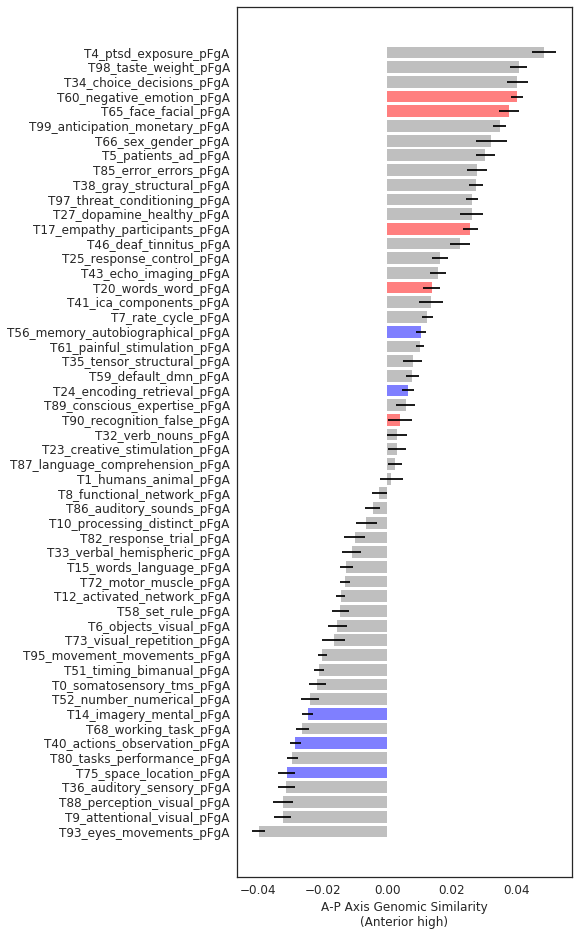

In [471]:
sns.set_context('notebook')
means = metares100.mean().tolist()
stds = metares100.sem().tolist()
cis = [((means[x]-stds[x]),(means[x]+stds[x])) for x in range(len(means))]

# get the range of the confidence interval
#y_r = [means[i] - cis[i][1] for i in range(len(cis))]
#y_r = [cis[i][0] - means[i] for i in range(len(cis))]
y_r = [((cis[i][0] - means[i]) + (means[i] - cis[i][1]))/2 for i in range(len(cis))]

colors = ['red' if res_sum3.loc[x,'system'] == 'AT' else 'blue' if res_sum3.loc[x,'system'] == 'PM' else 'gray' for x in metares100.columns]
plt.close()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6,16))
fig = plt.barh(range(len(means)), means, xerr=y_r, alpha=0.5, align='center', color = colors,
             )
#plt.xticks(range(len(means)), metares100.mean().dropna().index.tolist())
ax.set_yticks(range(len(means)))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(metares100.mean().dropna().index.tolist())
ax.set_xlabel('A-P Axis Genomic Similarity\n(Anterior high)')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/figs/COG_ALL_s100.pdf', bbox_inches = 'tight')
plt.show()

In [31]:
goodlabs = res_sum[res_sum.map_hits>400].index
len(goodlabs)
metares300 = metares_a[goodlabs]
metares300 = metares300[metares300.mean().sort_values().index]

In [32]:
res_sum4 = res_sum.loc[metares300.columns]
res_sum4.shape

(27, 7)

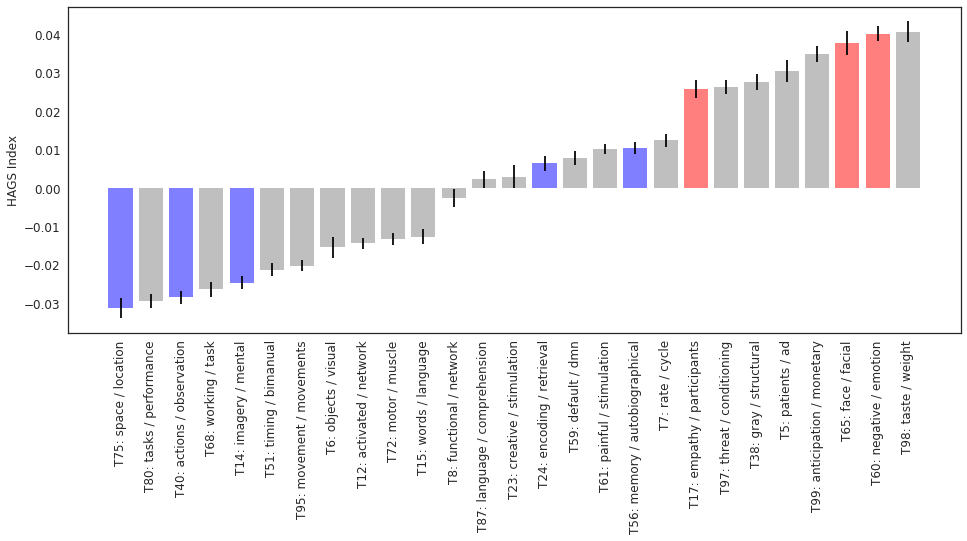

In [33]:
#sns.set_context('notebook',font_scale=2)
means = (metares300.mean()).tolist()
stds = metares300.sem().tolist()
cis = [((means[x]-stds[x]),(means[x]+stds[x])) for x in range(len(means))]
xlabs = ['%s: %s / %s'%(x.split('_')[0],
                x.split('_')[1],
                x.split('_')[2]) for x in metares300.mean().dropna().index.tolist()]

# get the range of the confidence interval
#y_r = [means[i] - cis[i][1] for i in range(len(cis))]
#y_r = [cis[i][0] - means[i] for i in range(len(cis))]
y_r = [((cis[i][0] - means[i]) + (means[i] - cis[i][1]))/2 for i in range(len(cis))]

colors = ['red' if res_sum4.loc[x,'system'] == 'AT' else 'blue' if res_sum4.loc[x,'system'] == 'PM' else 'gray' for x in metares300.columns]
plt.close()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(16,6))
fig = plt.bar(range(len(means)), means, yerr=y_r, alpha=0.5, align='center', color = colors,
             )
#plt.xticks(range(len(means)), metares300.mean().dropna().index.tolist())
ax.set_xticks(range(len(means)))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(xlabs, rotation=90)
ax.set_ylabel('HAGS Index')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/figs/COG_t100_s100_horiz.pdf')
plt.show()

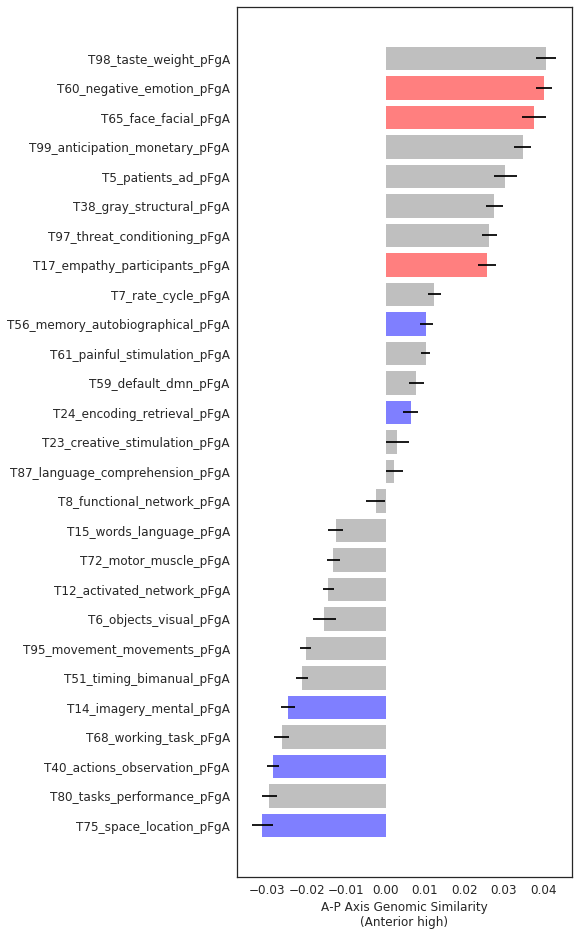

In [475]:
means = (metares300.mean()).tolist()
stds = metares300.sem().tolist()
cis = [((means[x]-stds[x]),(means[x]+stds[x])) for x in range(len(means))]

# get the range of the confidence interval
#y_r = [means[i] - cis[i][1] for i in range(len(cis))]
#y_r = [cis[i][0] - means[i] for i in range(len(cis))]
y_r = [((cis[i][0] - means[i]) + (means[i] - cis[i][1]))/2 for i in range(len(cis))]

colors = ['red' if res_sum4.loc[x,'system'] == 'AT' else 'blue' if res_sum4.loc[x,'system'] == 'PM' else 'gray' for x in metares300.columns]
plt.close()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6,16))
fig = plt.barh(range(len(means)), means, xerr=y_r, alpha=0.5, align='center', color = colors,
             )
#plt.xticks(range(len(means)), metares300.mean().dropna().index.tolist())
ax.set_yticks(range(len(means)))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(metares300.mean().dropna().index.tolist())
ax.set_xlabel('A-P Axis Genomic Similarity\n(Anterior high)')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/figs/COG_ALL_s400.pdf', bbox_inches = 'tight')
plt.show()

In [53]:
mni.shape

(182, 218, 182)

In [56]:
ni.load(metascans[0]).shape

(182, 218, 182)

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


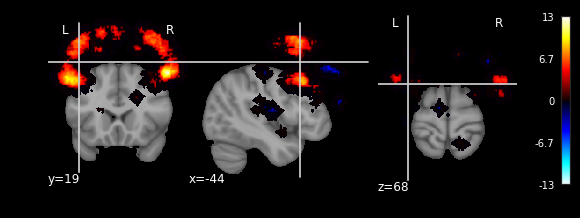

In [57]:
#jnk = ni.Nifti1Image(binmap,affine=ex.affine)
plt.close()
plotting.plot_stat_map(metascans[0], mni)
plt.show()

In [58]:
ex = ni.load(metascans[0])
x,y,z = ex.shape
parcels = []
for i in metares300.mean().index:
    jnk = i.split('_')
    hit = [x for x in metascans if '%s_%s'%(jnk[1],jnk[2]) in x][0]
    binmap = ni.load(hit).get_data()
    binmap[binmap>0] = metares300.mean()[i]
    binmap[binmap<0] = 0
    parcels.append(binmap.reshape(x,y,z,1))
print('concatenating')
concat = np.concatenate(parcels,axis=3)
print('averaging')
mn_map = concat.mean(3)
cog_img = ni.Nifti1Image(mn_map, ex.affine)
cog_img.to_filename('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/cognition_mri_analysis/cog400_allgenes_combonetwork')

concatenating
averaging


In [46]:
cog_img = ni.Nifti1Image(mn_map, ex.affine)
cog_img = image.resample_to_img(cog_img, mni)
cog_img.to_filename('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/cognition_mri_analysis/cog400_allgenes_combonetwork')

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


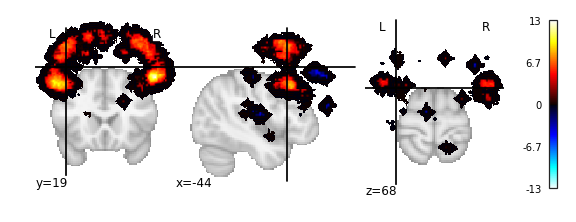

In [45]:
plt.close()
plotting.plot_stat_map(metascans[0])
plt.show()